In [1]:
import numpy as np
from numpy.linalg import norm as l2
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel, laplacian_kernel, sigmoid_kernel
from sklearn.preprocessing import KernelCenterer, StandardScaler
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from time import time
import pandas as pd

In [156]:
#fourclass dataset

data = load_svmlight_file("fourclass_scale")
x1 = data[0].toarray()
y1 = data[1]
y1.shape

(862,)

In [111]:
#add noise
randidxneg = np.random.choice(np.where(y1==-1)[0],30)
randidxpos = np.random.choice(np.where(y1==1)[0],20)

y1[randidxneg] = 1
y1[randidxpos] = -1

In [33]:
#breast cancer dataset

data2 = load_svmlight_file("breast-cancer_scale")
x2 = data2[0].toarray()
y2 = data2[1]
y2[np.where(y2==2)] = -1
y2[np.where(y2==4)] = 1
x2.shape

(683, 10)

In [140]:
#add noise
randidxneg = np.random.choice(np.where(y2==-1)[0],30)
randidxpos = np.random.choice(np.where(y2==1)[0],20)

y2[randidxneg] = 1
y2[randidxpos] = -1

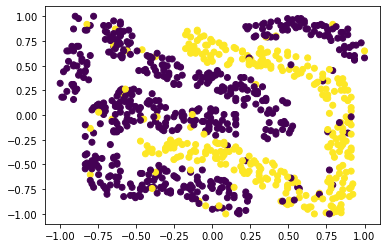

In [112]:
plt.scatter(x1[:,0],x1[:,1],c=y1)
plt.savefig("noise fourclass", bbox_inches='tight',dpi = 200)

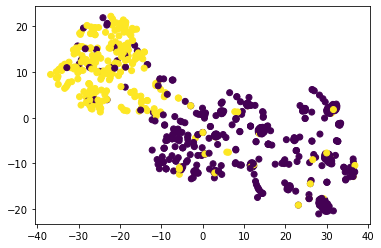

In [142]:
#using TSNE for breast cancer data visualisation

from sklearn.manifold import TSNE
xt = TSNE(2).fit_transform(x2)
plt.scatter(xt[:,0],xt[:,1],c=y2)
plt.savefig("noise breastcancer", bbox_inches='tight',dpi = 200)

In [75]:
def normalizedata(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def tau(x,loss,types):
    c = 1
    if types == "Classic":
        tau = loss/l2(x)
        return tau
    elif types == "FirstRelaxation":
        tau = min(c, loss/l2(x))
        return tau
    elif types == "SecondRelaxation":
        tau = loss/(l2(x) + (1/(2*c)))
        return tau

def pasvm(x,y,kernel="Linear",gamma=1,types="Classic"):
    if kernel == "Linear":
        x = x
    elif kernel == "RBF":
        x = rbf_kernel(x,gamma=gamma)
    elif kernel == "Polynomial":
        x = polynomial_kernel(x,gamma=gamma)
        x = normalizedata(x)
    elif kernel == "Sigmoid":
        x = sigmoid_kernel(x,gamma=gamma)
        x = normalizedata(x)
    w = np.random.randn(1,x.shape[1])
    y_pred_list = []
    for i in range(x.shape[0]):
        x1 = x[i, :].reshape(1, -1)
        y_pred = np.sign(np.dot(w,x1.T))
        loss = max(0, 1 - y[i]*(np.dot(w,x1.T)))
        tauu = tau(x1,loss,types)
        w = w + tauu*y[i]*x1
        y_pred_list.append(y_pred)
    return y_pred_list

#rbf 50

In [65]:
#dataframe to store results

methods = ["Linear Classic","Linear FR","Linear SR", "Linear SVM",
           "RBF Classic","RBF FR","RBF SR","RBF SVM",
           "Polynomial Classic","Polynomial FR","Polynomial SR","Polynomial SVM",
           "Sigmoid Classic","Sigmoid FR","Sigmoid SR","Sigmoid SVM"]
datasets = ["Fourclass","BreastCancer"]
timedf = pd.DataFrame(index=datasets,columns=methods)
accdf = pd.DataFrame(index=datasets,columns=methods)

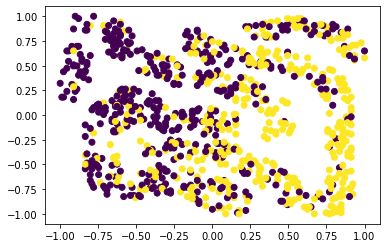

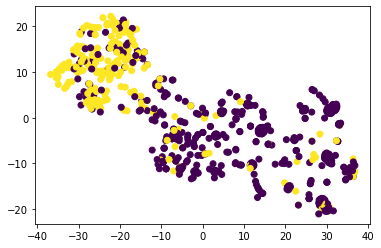

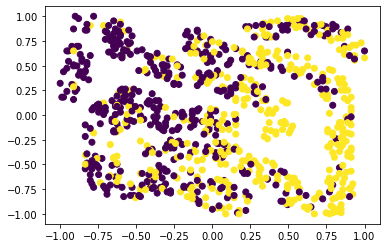

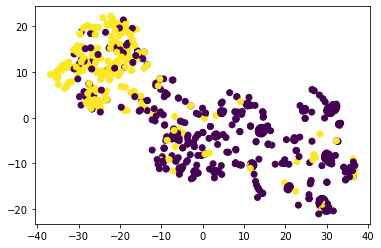

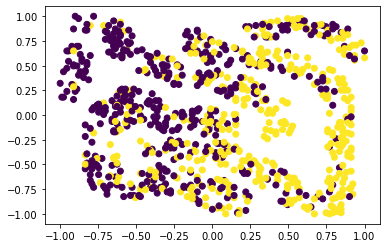

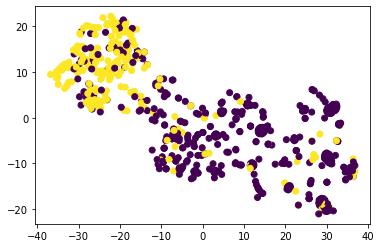

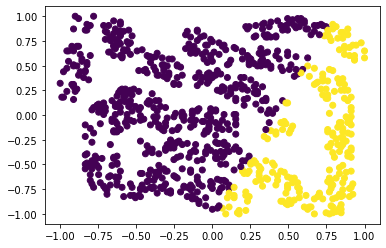

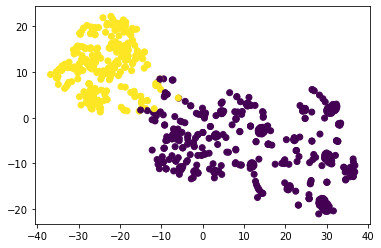

In [143]:
#Linear kernel 

#pasvm classic
#fourclass
t0 = time()
labels = pasvm(x1,y1,"Linear","Classic")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["Fourclass","Linear Classic"] = t1-t0
accdf.loc["Fourclass","Linear Classic"] = accuracy_score(labels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=labels)
plt.savefig("fourclass linear classic", bbox_inches='tight',dpi = 200)
#breast cancer
t0 = time()
labels = pasvm(x2,y2,"Linear","Classic")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["BreastCancer","Linear Classic"] = t1-t0
accdf.loc["BreastCancer","Linear Classic"] = accuracy_score(labels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=labels)
plt.savefig("breastcancer linear classic", bbox_inches='tight',dpi = 200)


#pasvm FirstRelaxation
#fourclass
t0 = time()
labels = pasvm(x1,y1,"Linear","FirstRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["Fourclass","Linear FR"] = t1-t0
accdf.loc["Fourclass","Linear FR"] = accuracy_score(labels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=labels)
plt.savefig("fourclass linear fr", bbox_inches='tight',dpi = 200)
#breast cancer
t0 = time()
labels = pasvm(x2,y2,"Linear","FirstRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["BreastCancer","Linear FR"] = t1-t0
accdf.loc["BreastCancer","Linear FR"] = accuracy_score(labels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=labels)
plt.savefig("breastcancer linear fr", bbox_inches='tight',dpi = 200)

#pasvm SecondRelaxation
#fourclass
t0 = time()
labels = pasvm(x1,y1,"Linear","SecondRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["Fourclass","Linear SR"] = t1-t0
accdf.loc["Fourclass","Linear SR"] = accuracy_score(labels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=labels)
plt.savefig("fourclass linear sr", bbox_inches='tight',dpi = 200)
#breast cancer
t0 = time()
labels = pasvm(x2,y2,"Linear","SecondRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["BreastCancer","Linear SR"] = t1-t0
accdf.loc["BreastCancer","Linear SR"] = accuracy_score(labels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=labels)
plt.savefig("breastcancer linear sr", bbox_inches='tight',dpi = 200)

#svm

#fourclasss
t0 = time()
clf = SVC(kernel="linear")
clf.fit(x1,y1)
svmlabels = clf.predict(x1)
t1 = time()
timedf.loc["Fourclass","Linear SVM"] = t1-t0
accdf.loc["Fourclass","Linear SVM"] = accuracy_score(svmlabels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=svmlabels)
plt.savefig("fourclass linear svm", bbox_inches='tight',dpi = 200)
#breastcancer
t0 = time()
clf = SVC(kernel="linear")
clf.fit(x2,y2)
svmlabels = clf.predict(x2)
t1 = time()
timedf.loc["BreastCancer","Linear SVM"] = t1-t0
accdf.loc["BreastCancer","Linear SVM"] = accuracy_score(svmlabels,y2)*100
plt.figure()
#xt = TSNE(2).fit_transform(x_test)
plt.scatter(xt[:,0],xt[:,1],c=svmlabels)
plt.savefig("breastcancer linear svm", bbox_inches='tight',dpi = 200)

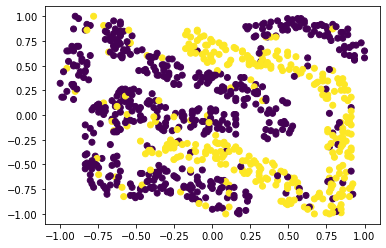

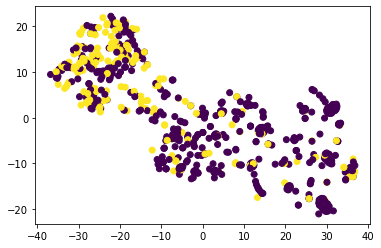

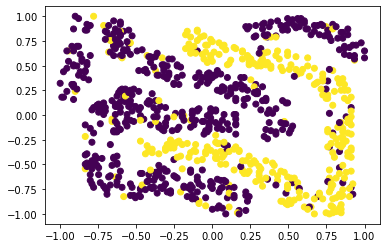

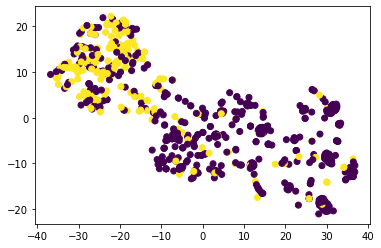

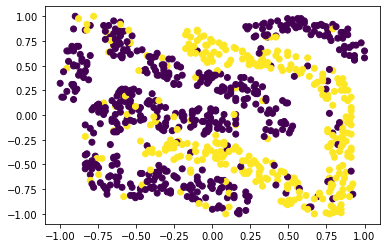

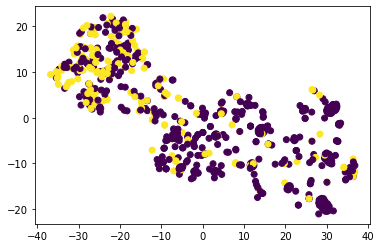

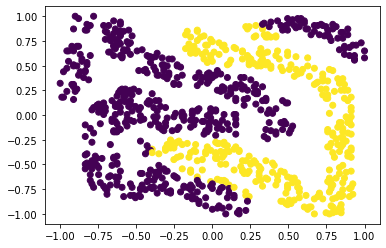

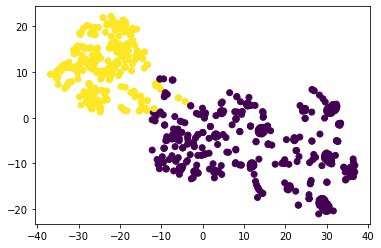

In [144]:
#RBF kernel 

#pasvm classic
#fourclass
acc = []
g = [i for i in range(10,100,10)]
for i in range(10,100,10):
    labels = pasvm(x1,y1,"RBF",i,"Classic")
    labels = [float(j) for j in labels]
    acc.append(accuracy_score(labels,y1)*100)
acc_dict = {g[i]: acc[i] for i in range(len(acc))} 
gammaf = max(acc_dict, key=acc_dict.get)
t0 = time()
labels = pasvm(x1,y1,"RBF",gammaf,"Classic")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["Fourclass","RBF Classic"] = t1-t0
accdf.loc["Fourclass","RBF Classic"] = accuracy_score(labels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=labels)
plt.savefig("fourclass rbf classic", bbox_inches='tight',dpi = 200)
#breast cancer
acc = []
g = [i for i in range(10,100,10)]
for i in range(10,100,10):
    labels = pasvm(x2,y2,"RBF",i,"Classic")
    labels = [float(j) for j in labels]
    acc.append(accuracy_score(labels,y2)*100)
acc_dict = {g[i]: acc[i] for i in range(len(acc))} 
gammab = max(acc_dict, key=acc_dict.get)
t0 = time()
labels = pasvm(x2,y2,"RBF",gammab,"Classic")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["BreastCancer","RBF Classic"] = t1-t0
accdf.loc["BreastCancer","RBF Classic"] = accuracy_score(labels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=labels)
plt.savefig("breastcancer rbf classic", bbox_inches='tight',dpi = 200)

#pasvm FirstRelaxation
#fourclass
t0 = time()
labels = pasvm(x1,y1,"RBF",gammaf,"FirstRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["Fourclass","RBF FR"] = t1-t0
accdf.loc["Fourclass","RBF FR"] = accuracy_score(labels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=labels)
plt.savefig("fourclass rbf fr", bbox_inches='tight',dpi = 200)
#breast cancer
t0 = time()
labels = pasvm(x2,y2,"RBF",gammab,"FirstRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["BreastCancer","RBF FR"] = t1-t0
accdf.loc["BreastCancer","RBF FR"] = accuracy_score(labels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=labels)
plt.savefig("breastcancer rbf fr", bbox_inches='tight',dpi = 200)

#pasvm SecondRelaxation
#fourclass
t0 = time()
labels = pasvm(x1,y1,"RBF",gammaf,"SecondRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["Fourclass","RBF SR"] = t1-t0
accdf.loc["Fourclass","RBF SR"] = accuracy_score(labels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=labels)
plt.savefig("fourclass rbf sr", bbox_inches='tight',dpi = 200)
#breast cancer
t0 = time()
labels = pasvm(x2,y2,"RBF",gammab,"SecondRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["BreastCancer","RBF SR"] = t1-t0
accdf.loc["BreastCancer","RBF SR"] = accuracy_score(labels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=labels)
plt.savefig("breastcancer rbf sr", bbox_inches='tight',dpi = 200)

#svm

#fourclasss
t0 = time()
clf = SVC(kernel="rbf")
#x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=69)
clf.fit(x1,y1)
svmlabels = clf.predict(x1)
t1 = time()
timedf.loc["Fourclass","RBF SVM"] = t1-t0
accdf.loc["Fourclass","RBF SVM"] = accuracy_score(svmlabels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=svmlabels)
plt.savefig("fourclass rbf svm", bbox_inches='tight',dpi = 200)
#breastcancer
t0 = time()
clf = SVC(kernel="rbf")
#x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.33, random_state=69)
clf.fit(x2,y2)
svmlabels = clf.predict(x2)
t1 = time()
timedf.loc["BreastCancer","RBF SVM"] = t1-t0
accdf.loc["BreastCancer","RBF SVM"] = accuracy_score(svmlabels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=svmlabels)
plt.savefig("breastcancer rbf svm", bbox_inches='tight',dpi = 200)

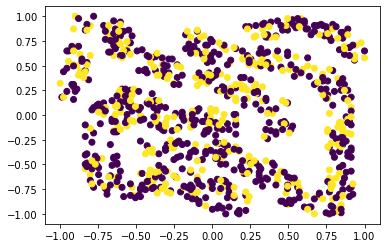

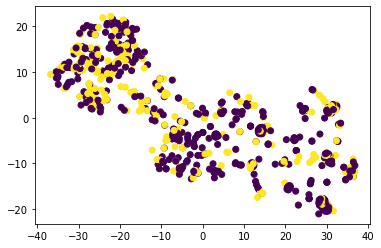

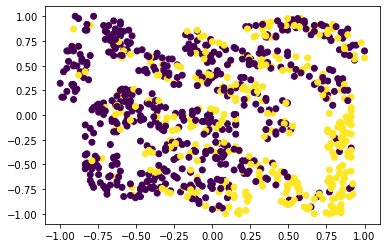

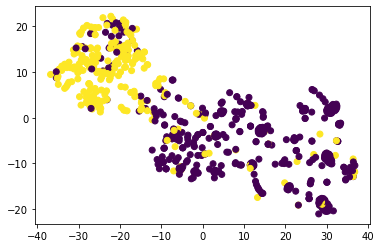

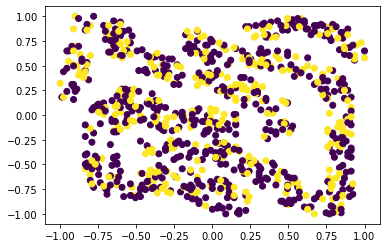

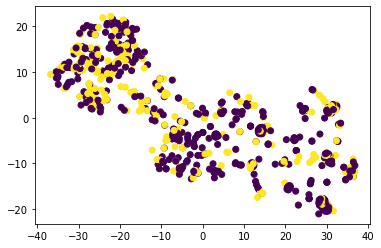

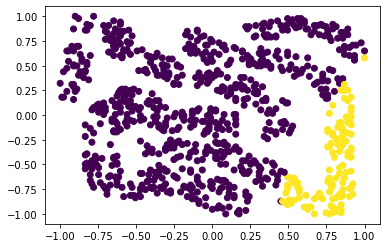

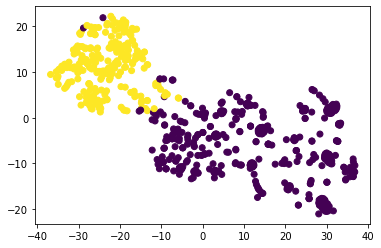

In [145]:
#Polynomial kernel 
gammaf = gammab = 2
#pasvm classic
#fourclass
t0 = time()
labels = pasvm(x1,y1,"Polynomial",gammaf,"Classic")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["Fourclass","Polynomial Classic"] = t1-t0
accdf.loc["Fourclass","Polynomial Classic"] = accuracy_score(labels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=labels)
plt.savefig("fourclass poly classic", bbox_inches='tight',dpi = 200)
#breast cancer
t0 = time()
labels = pasvm(x2,y2,"Polynomial",gammab,"Classic")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["BreastCancer","Polynomial Classic"] = t1-t0
accdf.loc["BreastCancer","Polynomial Classic"] = accuracy_score(labels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=labels)
plt.savefig("breastcancer poly classic", bbox_inches='tight',dpi = 200)

#pasvm FirstRelaxation
#fourclass
t0 = time()
labels = pasvm(x1,y1,"Polynomial",gammaf,"FirstRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["Fourclass","Polynomial FR"] = t1-t0
accdf.loc["Fourclass","Polynomial FR"] = accuracy_score(labels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=labels)
plt.savefig("fourclass poly fr", bbox_inches='tight',dpi = 200)
#breast cancer
t0 = time()
labels = pasvm(x2,y2,"Polynomial",gammab,"FirstRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["BreastCancer","Polynomial FR"] = t1-t0
accdf.loc["BreastCancer","Polynomial FR"] = accuracy_score(labels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=labels)
plt.savefig("breastcancer poly fr", bbox_inches='tight',dpi = 200)

#pasvm SecondRelaxation
#fourclass
t0 = time()
labels = pasvm(x1,y1,"Polynomial",gammaf,"SecondRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["Fourclass","Polynomial SR"] = t1-t0
accdf.loc["Fourclass","Polynomial SR"] = accuracy_score(labels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=labels)
plt.savefig("fourclass poly sr", bbox_inches='tight',dpi = 200)
#breast cancer
t0 = time()
labels = pasvm(x2,y2,"Polynomial",gammab,"SecondRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["BreastCancer","Polynomial SR"] = t1-t0
accdf.loc["BreastCancer","Polynomial SR"] = accuracy_score(labels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=labels)
plt.savefig("breastcancer poly sr", bbox_inches='tight',dpi = 200)

#svm

#fourclasss
t0 = time()
clf = SVC(kernel="poly")
#x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=69)
clf.fit(x1,y1)
svmlabels = clf.predict(x1)
t1 = time()
timedf.loc["Fourclass","Polynomial SVM"] = t1-t0
accdf.loc["Fourclass","Polynomial SVM"] = accuracy_score(svmlabels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=svmlabels)
plt.savefig("fourclass poly svm", bbox_inches='tight',dpi = 200)
#breastcancer
t0 = time()
clf = SVC(kernel="poly")
#x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.33, random_state=69)
clf.fit(x2,y2)
svmlabels = clf.predict(x2)
t1 = time()
timedf.loc["BreastCancer","Polynomial SVM"] = t1-t0
accdf.loc["BreastCancer","Polynomial SVM"] = accuracy_score(svmlabels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=svmlabels)
plt.savefig("breastcancer poly svm", bbox_inches='tight',dpi = 200)

In [146]:
#Sigmoid kernel 

#pasvm classic
#fourclass
acc = []
g = [i for i in range(80,150,10)]
for i in range(80,150,10):
    labels = pasvm(x1,y1,"Sigmoid",i,"Classic")
    labels = [float(j) for j in labels]
    acc.append(accuracy_score(labels,y1)*100)
acc_dict = {g[i]: acc[i] for i in range(len(acc))} 
gammaf = max(acc_dict, key=acc_dict.get)
t0 = time()
labels = pasvm(x1,y1,"Sigmoid",gammaf,"Classic")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["Fourclass","Sigmoid Classic"] = t1-t0
accdf.loc["Fourclass","Sigmoid Classic"] = accuracy_score(labels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=labels)
plt.savefig("fourclass sigmoid classic", bbox_inches='tight',dpi = 200)
#breast cancer
acc = []
g = [i for i in range(80,150,10)]
for i in range(80,150,10):
    labels = pasvm(x2,y2,"Sigmoid",i,"Classic")
    labels = [float(j) for j in labels]
    acc.append(accuracy_score(labels,y2)*100)
acc_dict = {g[i]: acc[i] for i in range(len(acc))} 
gammab = max(acc_dict, key=acc_dict.get)
t0 = time()
labels = pasvm(x2,y2,"Sigmoid",gammab,"Classic")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["BreastCancer","Sigmoid Classic"] = t1-t0
accdf.loc["BreastCancer","Sigmoid Classic"] = accuracy_score(labels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=labels)
plt.savefig("breastcancer sigmoid classic", bbox_inches='tight',dpi = 200)

#pasvm FirstRelaxation
#fourclass
t0 = time()
labels = pasvm(x1,y1,"Sigmoid",gammaf,"FirstRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["Fourclass","Sigmoid FR"] = t1-t0
accdf.loc["Fourclass","Sigmoid FR"] = accuracy_score(labels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=labels)
plt.savefig("fourclass sigmoid fr", bbox_inches='tight',dpi = 200)
#breast cancer
t0 = time()
labels = pasvm(x2,y2,"Sigmoid",gammab,"FirstRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["BreastCancer","Sigmoid FR"] = t1-t0
accdf.loc["BreastCancer","Sigmoid FR"] = accuracy_score(labels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=labels)
plt.savefig("breastcancer sigmoid fr", bbox_inches='tight',dpi = 200)

#pasvm SecondRelaxation
#fourclass
t0 = time()
labels = pasvm(x1,y1,"Sigmoid",gammaf,"SecondRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["Fourclass","Sigmoid SR"] = t1-t0
accdf.loc["Fourclass","Sigmoid SR"] = accuracy_score(labels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=labels)
plt.savefig("fourclass sigmoid sr", bbox_inches='tight',dpi = 200)
#breast cancer
t0 = time()
labels = pasvm(x2,y2,"Sigmoid",gammab,"SecondRelaxation")
t1 = time()
labels = [float(i) for i in labels]
timedf.loc["BreastCancer","Sigmoid SR"] = t1-t0
accdf.loc["BreastCancer","Sigmoid SR"] = accuracy_score(labels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=labels)
plt.savefig("breastcancer sigmoid sr", bbox_inches='tight',dpi = 200)

#svm

#fourclasss
t0 = time()
clf = SVC(kernel="sigmoid")
#x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=69)
clf.fit(x1,y1)
svmlabels = clf.predict(x1)
t1 = time()
timedf.loc["Fourclass","Sigmoid SVM"] = t1-t0
accdf.loc["Fourclass","Sigmoid SVM"] = accuracy_score(svmlabels,y1)*100
plt.figure()
plt.scatter(x1[:,0],x1[:,1],c=svmlabels)
plt.savefig("fourclass sigmoid svm", bbox_inches='tight',dpi = 200)
#breastcancer
t0 = time()
clf = SVC(kernel="sigmoid")
#x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.33, random_state=69)
clf.fit(x2,y2)
svmlabels = clf.predict(x2)
t1 = time()
timedf.loc["BreastCancer","Sigmoid SVM"] = t1-t0
accdf.loc["BreastCancer","Sigmoid SVM"] = accuracy_score(svmlabels,y2)*100
plt.figure()
plt.scatter(xt[:,0],xt[:,1],c=svmlabels)
plt.savefig("breastcancer sigmoid svm", bbox_inches='tight',dpi = 200)

<ipython-input-75-f75b88de4625>:34: RuntimeWarning: invalid value encountered in multiply
  w = w + tauu*y[i]*x1
<ipython-input-75-f75b88de4625>:31: RuntimeWarning: invalid value encountered in sign
  y_pred = np.sign(np.dot(w,x1.T))
<ipython-input-75-f75b88de4625>:32: RuntimeWarning: invalid value encountered in greater
  loss = max(0, 1 - y[i]*(np.dot(w,x1.T)))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [147]:
accdf

,Linear Classic,Linear FR,Linear SR,Linear SVM,RBF Classic,RBF FR,RBF SR,RBF SVM,Polynomial Classic,Polynomial FR,Polynomial SR,Polynomial SVM,Sigmoid Classic,Sigmoid FR,Sigmoid SR,Sigmoid SVM
Fourclass,61.4849,61.7169,61.4849,73.0858,85.3828,87.007,85.3828,91.1833,53.8283,63.109,53.4803,73.3179,NaN,NaN,NaN,NaN
BreastCancer,78.3309,78.3309,78.3309,90.1903,69.8389,72.1816,68.3748,90.4832,58.2723,80.8199,58.2723,91.0688,NaN,NaN,NaN,NaN


In [148]:
methods = ["Classic","First Relax.","Second Relax.", "SVM"]
algo = ["Linear","RBF","Polynomial"]
accfour = pd.DataFrame(index=algo,columns=methods)
accbreast = pd.DataFrame(index=algo,columns=methods)

accfour.iloc[0,0:4] = accdf.iloc[0,0:4].values
accfour.iloc[1,0:4] = accdf.iloc[0,4:8].values
accfour.iloc[2,0:4] = accdf.iloc[0,8:12].values

accbreast.iloc[0,0:4] = accdf.iloc[1,0:4].values
accbreast.iloc[1,0:4] = accdf.iloc[1,4:8].values
accbreast.iloc[2,0:4] = accdf.iloc[1,8:12].values


In [463]:
methods = ["Classic","First Relax.","Second Relax.", "SVM"]
algo = ["Linear","RBF","Polynomial","Sigmoid"]
accfour = pd.DataFrame(index=algo,columns=methods)
accbreast = pd.DataFrame(index=algo,columns=methods)
timefour = pd.DataFrame(index=algo,columns=methods)
timebreast = pd.DataFrame(index=algo,columns=methods)

In [464]:
accfour.iloc[0,0:4] = accdf.iloc[0,0:4].values
accfour.iloc[1,0:4] = accdf.iloc[0,4:8].values
accfour.iloc[2,0:4] = accdf.iloc[0,8:12].values
accfour.iloc[3,0:4] = accdf.iloc[0,12:16].values

accbreast.iloc[0,0:4] = accdf.iloc[1,0:4].values
accbreast.iloc[1,0:4] = accdf.iloc[1,4:8].values
accbreast.iloc[2,0:4] = accdf.iloc[1,8:12].values
accbreast.iloc[3,0:4] = accdf.iloc[1,12:16].values

timefour.iloc[0,0:4] = timedf.iloc[0,0:4].values
timefour.iloc[1,0:4] = timedf.iloc[0,4:8].values
timefour.iloc[2,0:4] = timedf.iloc[0,8:12].values
timefour.iloc[3,0:4] = timedf.iloc[0,12:16].values

timebreast.iloc[0,0:4] = timedf.iloc[1,0:4].values
timebreast.iloc[1,0:4] = timedf.iloc[1,4:8].values
timebreast.iloc[2,0:4] = timedf.iloc[1,8:12].values
timebreast.iloc[3,0:4] = timedf.iloc[1,12:16].values

In [149]:
accfour

,Classic,First Relax.,Second Relax.,SVM
Linear,61.4849,61.7169,61.4849,73.0858
RBF,85.3828,87.007,85.3828,91.1833
Polynomial,53.8283,63.109,53.4803,73.3179


In [150]:
accbreast

,Classic,First Relax.,Second Relax.,SVM
Linear,78.3309,78.3309,78.3309,90.1903
RBF,69.8389,72.1816,68.3748,90.4832
Polynomial,58.2723,80.8199,58.2723,91.0688


In [465]:
timefour

,Classic,First Relax.,Second Relax.,SVM
Linear,0.0229099,0.0156217,0.0156202,0.00997162
RBF,0.0312417,0.0312431,0.0309169,0.0119679
Polynomial,0.0787868,0.0781062,0.036489,0.0156209
Sigmoid,0.0312421,0.0468743,0.0369031,0.0179513


In [466]:
timebreast

,Classic,First Relax.,Second Relax.,SVM
Linear,0.015619,0.0156212,0.00626755,0
RBF,0.0156231,0.0298889,0.0156221,0
Polynomial,0.0312438,0.0312436,0.0468614,0
Sigmoid,0.0312419,0.0155973,0.0358751,0.00598288


In [419]:
accdf.iloc[:,0:4]

,Linear Classic,Linear FR,Linear SR,Linear SVM
Fourclass,67.0534,67.1694,67.2854,77.1462
BreastCancer,93.4114,94.1435,93.8507,97.0717


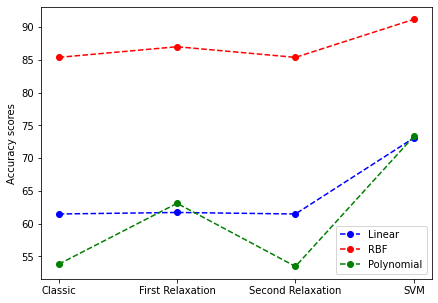

In [153]:
plt.figure(figsize=(7,5))
plt.plot(accdf.iloc[0,0:4].values, linestyle='--', marker='o',label ="Linear",color="b")
plt.plot(accdf.iloc[0,4:8].values, linestyle='--', marker='o',label ="RBF",color="r")
plt.plot(accdf.iloc[0,8:12].values, linestyle='--', marker='o',label ="Polynomial",color="g")
plt.plot(accdf.iloc[0,12:16].values, linestyle='--', marker='o',label ="Sigmoid",color="y")
plt.xticks([0,1,2,3],["Classic","First Relaxation","Second Relaxation","SVM"])
plt.legend()
plt.ylabel("Accuracy scores")
plt.savefig("accuracy fourclass", bbox_inches='tight',dpi = 200)

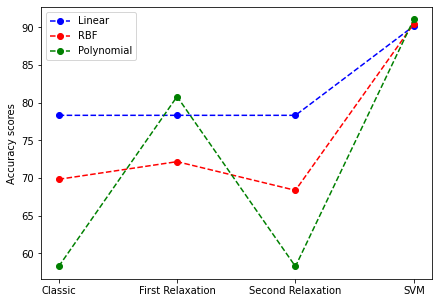

In [154]:
plt.figure(figsize=(7,5))
plt.plot(accdf.iloc[1,0:4].values, linestyle='--', marker='o',label ="Linear",color="b")
plt.plot(accdf.iloc[1,4:8].values, linestyle='--', marker='o',label ="RBF",color="r")
plt.plot(accdf.iloc[1,8:12].values, linestyle='--', marker='o',label ="Polynomial",color="g")
plt.plot(accdf.iloc[1,12:16].values, linestyle='--', marker='o',label ="Sigmoid",color="y")
plt.xticks([0,1,2,3],["Classic","First Relaxation","Second Relaxation","SVM"])
plt.legend()
plt.ylabel("Accuracy scores")
plt.savefig("accuracy breastcancer", bbox_inches='tight',dpi = 200)

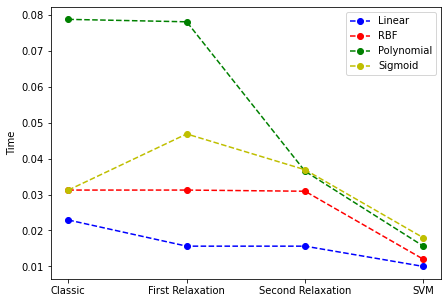

In [446]:
plt.figure(figsize=(7,5))
plt.plot(timedf.iloc[0,0:4].values, linestyle='--', marker='o',label ="Linear",color="b")
plt.plot(timedf.iloc[0,4:8].values, linestyle='--', marker='o',label ="RBF",color="r")
plt.plot(timedf.iloc[0,8:12].values, linestyle='--', marker='o',label ="Polynomial",color="g")
plt.plot(timedf.iloc[0,12:16].values, linestyle='--', marker='o',label ="Sigmoid",color="y")
plt.xticks([0,1,2,3],["Classic","First Relaxation","Second Relaxation","SVM"])
plt.legend()
plt.ylabel("Time")
plt.savefig("time fourclass", bbox_inches='tight',dpi = 200)

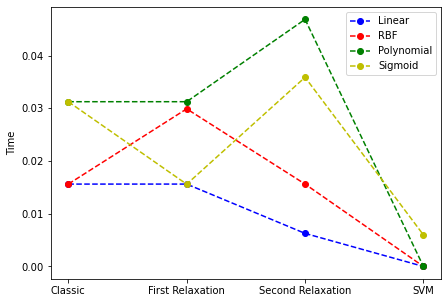

In [447]:
plt.figure(figsize=(7,5))
plt.plot(timedf.iloc[1,0:4].values, linestyle='--', marker='o',label ="Linear",color="b")
plt.plot(timedf.iloc[1,4:8].values, linestyle='--', marker='o',label ="RBF",color="r")
plt.plot(timedf.iloc[1,8:12].values, linestyle='--', marker='o',label ="Polynomial",color="g")
plt.plot(timedf.iloc[1,12:16].values, linestyle='--', marker='o',label ="Sigmoid",color="y")
plt.xticks([0,1,2,3],["Classic","First Relaxation","Second Relaxation","SVM"])
plt.legend()
plt.ylabel("Time")
plt.savefig("time breastcancer", bbox_inches='tight',dpi = 200)

In [155]:
accdf

,Linear Classic,Linear FR,Linear SR,Linear SVM,RBF Classic,RBF FR,RBF SR,RBF SVM,Polynomial Classic,Polynomial FR,Polynomial SR,Polynomial SVM,Sigmoid Classic,Sigmoid FR,Sigmoid SR,Sigmoid SVM
Fourclass,61.4849,61.7169,61.4849,73.0858,85.3828,87.007,85.3828,91.1833,53.8283,63.109,53.4803,73.3179,NaN,NaN,NaN,NaN
BreastCancer,78.3309,78.3309,78.3309,90.1903,69.8389,72.1816,68.3748,90.4832,58.2723,80.8199,58.2723,91.0688,NaN,NaN,NaN,NaN
